<a href="https://colab.research.google.com/github/leeh8911/-_-/blob/master/Copy_of_CS231n_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS231n L3 Loss function and optimization
* TODO :    
    1. Define a *loss function* that quantifies our unhappiness with the scores across the trainning data
    2. Come up with a way of efficiently finding the parameters that minimize the loss function(*optimization*)

## Loss functions
* Given a dataset of examples $\{(x_{i}, y_{i})\}^{N}_{i=1}$. Where $x_i$ is image and $y_i$ is integer label
* Loss over the dataset is a sum of loss over examples :
    $ L = \frac{1}{N}\sum_i{L_i(f(x_i,W),y_i)}$


## optimization


Trainning data : 
Number of examples : 50000
Number of channels : 3
Image size : 32 X 32

Test data : 
Number of examples : 10000
Number of channels : 3
Image size : 32 X 32


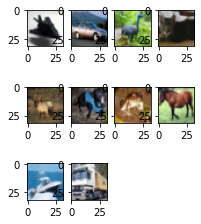

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [2]:
# Load dataset
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train),(x_test, y_test) = cifar10.load_data()
image_width = x_train.shape[1]
image_height = x_train.shape[2]
image_channels = x_train.shape[3]

print("Trainning data : ")
print("Number of examples : {}".format(x_train.shape[0]))
print("Number of channels : {}".format(x_train.shape[3]))
print("Image size : {} X {}".format(x_train.shape[1], x_train.shape[2]))
print("")
print("Test data : ")
print("Number of examples : {}".format(x_test.shape[0]))
print("Number of channels : {}".format(x_test.shape[3]))
print("Image size : {} X {}".format(x_test.shape[1], x_test.shape[2]))

fig = plt.figure(figsize=(3,4))
for i in range(10):
    index = np.where(y_train[:,0] == i)
    fig.add_subplot(3,4,i+1)
    plt.imshow(x_train[index[0][0],:,:,:])
plt.show()

label = {}
labels_s = "airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck"
labels_s = labels_s.split(", ")
i = 0
for l in labels_s:
    label[l] = i
    i += 1
    
label


{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
airplane 0


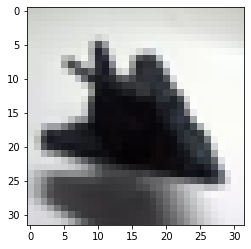

[[ 190.67365385]
 [-142.36666444]
 [-307.42449449]
 [  -3.44730058]
 [ -45.44298902]
 [-221.32614007]
 [ 164.66772265]
 [  19.38538096]
 [ 389.99386514]
 [  95.6922655 ]]
automobile 1


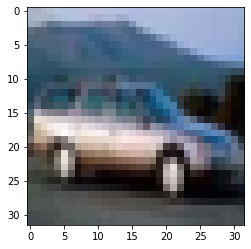

[[ 213.43931967]
 [-147.79032391]
 [-283.71130647]
 [ -64.52117366]
 [-147.24232821]
 [  -4.27437394]
 [ 203.49113401]
 [ 122.16666961]
 [ 159.17137688]
 [ 149.11514796]]
bird 2


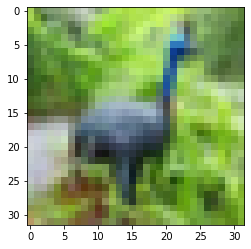

[[ 165.90572515]
 [-123.90426014]
 [-153.93740754]
 [  48.32025748]
 [-144.64421285]
 [ -45.39089561]
 [ 171.88168005]
 [ -19.73468268]
 [ 310.69178692]
 [ -78.98981786]]
cat 3


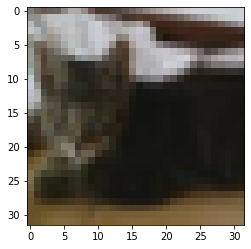

[[ 176.14314318]
 [-121.30068458]
 [-146.0046535 ]
 [  80.33195559]
 [ -74.40246057]
 [-184.94074878]
 [  66.60553731]
 [  27.85031272]
 [ 141.85543766]
 [   7.23068717]]
deer 4


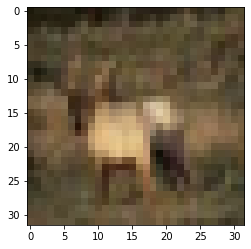

[[  83.59591813]
 [ -87.42816119]
 [ -62.72444091]
 [ -53.70375593]
 [-109.17606907]
 [ -21.06875973]
 [ 111.40259031]
 [  36.81163991]
 [ 109.68971404]
 [  46.01042944]]
dog 5


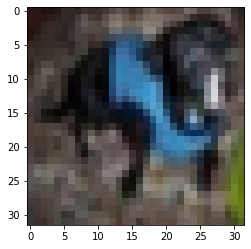

[[ 86.16320671]
 [-21.56794471]
 [-72.03106074]
 [-26.46801102]
 [-40.1196307 ]
 [-25.78777438]
 [137.09842752]
 [105.02202567]
 [ 95.63428716]
 [-68.31543539]]
frog 6


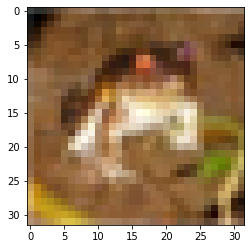

[[ 115.28164206]
 [-175.93667965]
 [-149.32282592]
 [ -58.24478604]
 [-212.04854587]
 [  44.69563917]
 [ 140.08119203]
 [  94.48833194]
 [ 232.0905924 ]
 [ -91.76854255]]
horse 7


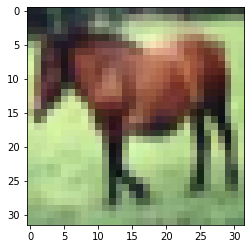

[[ 203.99160086]
 [-224.29499569]
 [-232.93164278]
 [ -47.81060283]
 [-139.23050948]
 [ -37.86873963]
 [ 140.44528747]
 [ 108.32787134]
 [ 294.87621102]
 [ -79.43254351]]
ship 8


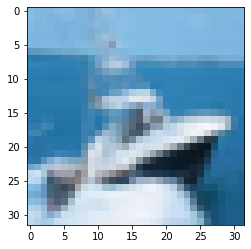

[[ 247.61921783]
 [-160.84889699]
 [-269.26554339]
 [-223.66565102]
 [ -70.96541294]
 [-119.43020954]
 [ 271.16939624]
 [ 123.0262758 ]
 [ 230.35107129]
 [  51.29916583]]
truck 9


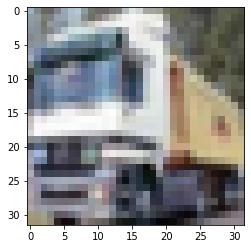

[[ 223.86057958]
 [-199.90353328]
 [-199.32132741]
 [-174.72472819]
 [-126.11934736]
 [   5.18394675]
 [ 284.10365817]
 [ -14.35578822]
 [ 277.76018585]
 [ -10.5692905 ]]


In [15]:
# 3 image example
# cat, car, frog
# f(x, W) = Wx --> score!
def getScore(W, x):
    s = W.T.dot(x)
    return s

N = image_channels*image_height*image_width

W = np.random.randn(N,len(label))
W /= np.sum(np.sum(W))


for key, value in label.items():
    index_set = np.where(y_train[:,0] == value)
    i = index_set[0][0] # get first index
    
    x = x_train[i,:,:,:].reshape(N,1)
    s = getScore(W, x)
    print(key, value)
    plt.imshow(x_train[i,:,:,:])
    plt.show()
    print(s)


In [ ]:
def loss_svm(s, y):
    s_y = s(y)
    L_i = 0
    for j in range(len(s)):
        s_j = s(j)
        L_i += np.max(0, s_y - s_j + 1)

    return L_i